In [1]:
import numpy as np
from scipy import integrate as intg 
from scipy import optimize as opt
from matplotlib import pyplot as plt 
import time 
import BQPDynamics as bqp
import Eilenberger as eil

plt.rcParams['font.size']=14
plt.rcParams['text.usetex']=True

In [2]:
Tc = 1.

ntheta = 50
cutoff = 10.*eil.BCS_ratio*Tc
nw = 100

fine_nw = 200
fine_cutoff = 1.*eil.BCS_ratio*Tc

ntemps = 11
temps = np.linspace(0.9,1.05,ntemps)

gaps = np.zeros((ntemps))
times = np.zeros_like(gaps)

sim = eil.Eilenberger(nw,ntheta,cutoff,fine_grid=(fine_nw,fine_cutoff))
print(sim.zero/sim.Tc)
sim.verbose = True
sim.set_gamma_imp(0.1)
sim.set_Tc(1.)
sim.set_BCS_coupling(sim.calc_BCS_coupling() )
grs = []

for i in range(ntemps):
    print(str(i))
    sim.set_temperature(temps[i])
    t0 = time.time()
    if i > 0:
        gr, gap = sim.calc_eq(grs[i-1],gaps[i-1])
        grs.append(gr)
        gaps[i] = np.abs(gap)
    else:
        gr,gap = sim.calc_eq()
        grs.append(gr)
        gaps[i] = np.abs(gap)
    t1 = time.time()
    times[i] = t1-t0


0.03527753977724091
0
A solution was found at the specified tolerance.
1
A solution was found at the specified tolerance.
2
A solution was found at the specified tolerance.
3
A solution was found at the specified tolerance.
4


KeyboardInterrupt: 

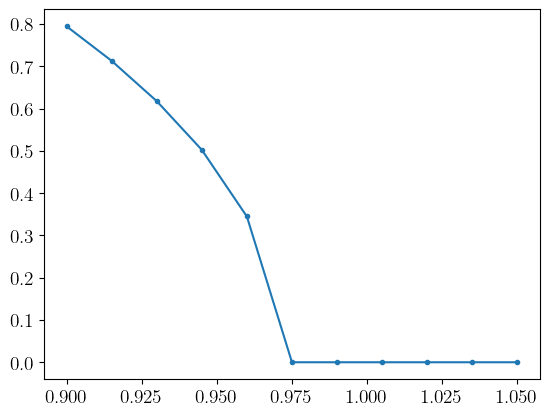

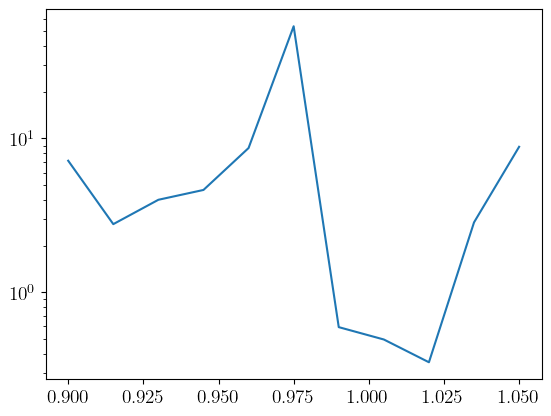

In [3]:
plt.plot(temps,gaps[:],marker='.')
plt.show()
plt.plot(temps,times[:])
plt.yscale('log')
plt.show()

In [4]:
Tc = 1.

ntheta = 50
cutoff = 10.*eil.BCS_ratio*Tc
nw = 100

fine_nw = 200
fine_cutoff = 1.*eil.BCS_ratio*Tc

sim = eil.Eilenberger(nw,ntheta,cutoff,fine_grid=(fine_nw,fine_cutoff))
sim.verbose = True
sim.set_gamma_imp(0.3)
sim.set_Dynes_eta(0.03)
sim.set_Tc(1.)
sim.set_BCS_coupling(sim.calc_BCS_coupling() )
sim.set_temperature(0.1*Tc)
timers = np.zeros((nDelta,nQ))

nDelta = 100
nQ = 50
t0 = time.time()
sim.precompute_hr(nDelta,nQ)
t1 = time.time()
print(f"{sim.nDelta} x {sim.nQ} grid precomputation of hR: {t1-t0:0.2f}s")

0.03
Precompute loop: 0/100 x 0/50
Gap: 0.000
Q: -17.639
Loop: 0, err: 0.010841887346305753
Loop: 1, err: 0.009757681406967752
Converged on 1 iterations
Time: 0.27s

Precompute loop: 0/100 x 1/50
Gap: 0.000
Q: -16.919
Loop: 0, err: 0.011212349766202038
Loop: 1, err: 0.010091095760297663
Loop: 2, err: 0.009081961008700904
Converged on 2 iterations
Time: 0.01s

Precompute loop: 0/100 x 2/50
Gap: 0.000
Q: -16.199
Loop: 0, err: 0.011605535726273005
Loop: 1, err: 0.010444961051431294
Loop: 2, err: 0.009400437028267542
Converged on 2 iterations
Time: 0.01s

Precompute loop: 0/100 x 3/50
Gap: 0.000
Q: -15.479
Loop: 0, err: 0.01202314655143914
Loop: 1, err: 0.010820808433120277
Loop: 2, err: 0.009738696548277245
Converged on 2 iterations
Time: 0.01s

Precompute loop: 0/100 x 4/50
Gap: 0.000
Q: -14.759
Loop: 0, err: 0.012466968070169813
Loop: 1, err: 0.011220245104535077
Loop: 2, err: 0.010098185986529284
Loop: 3, err: 0.00908832957355247
Converged on 3 iterations
Time: 0.01s

Precompute loop: 

In [4]:
sim._calc_gr(0.,0.)

The maximum number of iterations allowed has been reached.


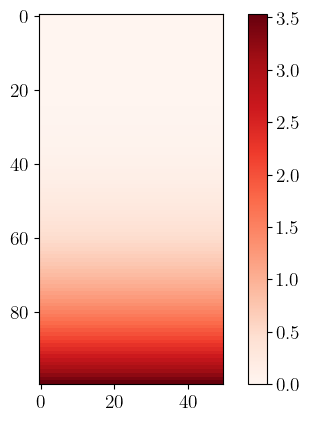

In [8]:
plt.imshow(np.abs(sim.Delta_grid),cmap='Reds')
plt.colorbar()
plt.show()

In [9]:
sim.sigma_r_grid.shape

(2, 2, 301, 50, 100, 50)

In [15]:
print(sim.sigma_r_grid[...,0,0].nbytes/1e6)

0.9632
